# Feature Extraction

## Import Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_train_full = pd.read_csv("../Data/data_train_full_preprocessed.csv",sep=";")
data_test_full = pd.read_csv("../Data/data_test_full_preprocessed.csv",sep=";")
data_val_full = pd.read_csv("../Data/data_val_full_preprocessed.csv",sep=";")

data_train_nostopword = pd.read_csv("../Data/data_train_nostopword_preprocessed.csv",sep=";")
data_test_nostopword = pd.read_csv("../Data/data_test_nostopword_preprocessed.csv",sep=";")
data_val_nostopword = pd.read_csv("../Data/data_val_nostopword_preprocessed.csv",sep=";")

data_train_nostemstop = pd.read_csv("../Data/data_train_nostemstop_preprocessed.csv",sep=";")
data_test_nostemstop = pd.read_csv("../Data/data_test_nostemstop_preprocessed.csv",sep=";")
data_val_nostemstop = pd.read_csv("../Data/data_val_nostemstop_preprocessed.csv",sep=";")

In [3]:
data_train_trans_full = pd.read_csv("../Data/data_train_trans_full_preprocessed.csv",sep=";")
data_test_trans_full = pd.read_csv("../Data/data_test_trans_full_preprocessed.csv",sep=";")
data_val_trans_full = pd.read_csv("../Data/data_val_trans_full_preprocessed.csv",sep=";")

data_train_trans_nostopword = pd.read_csv("../Data/data_train_trans_nostopword_preprocessed.csv",sep=";")
data_test_trans_nostopword = pd.read_csv("../Data/data_test_trans_nostopword_preprocessed.csv",sep=";")
data_val_trans_nostopword = pd.read_csv("../Data/data_val_trans_nostopword_preprocessed.csv",sep=";")

data_train_trans_nostemstop = pd.read_csv("../Data/data_train_trans_nostemstop_preprocessed.csv",sep=";")
data_test_trans_nostemstop = pd.read_csv("../Data/data_test_trans_nostemstop_preprocessed.csv",sep=";")
data_val_trans_nostemstop = pd.read_csv("../Data/data_val_trans_nostemstop_preprocessed.csv",sep=";")

## Feature Target Split

In [4]:
X_train_full = data_train_full['Tweet_Parsed']
X_test_full = data_test_full['Tweet_Parsed']
X_val_full = data_val_full['Tweet_Parsed']
y_train_full = data_train_full.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_full = data_test_full.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_full = data_val_full.drop(['Tweet','Tweet_Parsed'],axis=1)

X_train_nostopword = data_train_nostopword['Tweet_Parsed']
X_test_nostopword = data_test_nostopword['Tweet_Parsed']
X_val_nostopword = data_val_nostopword['Tweet_Parsed']
y_train_nostopword = data_train_nostopword.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_nostopword = data_test_nostopword.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_nostopword = data_val_nostopword.drop(['Tweet','Tweet_Parsed'],axis=1)

X_train_nostemstop = data_train_nostemstop['Tweet_Parsed']
X_test_nostemstop = data_test_nostemstop['Tweet_Parsed']
X_val_nostemstop = data_val_nostemstop['Tweet_Parsed']
y_train_nostemstop = data_train_nostemstop.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_nostemstop = data_test_nostemstop.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_nostemstop = data_val_nostemstop.drop(['Tweet','Tweet_Parsed'],axis=1)

In [5]:
X_train_trans_full = data_train_trans_full['Tweet_Parsed']
X_test_trans_full = data_test_trans_full['Tweet_Parsed']
X_val_trans_full = data_val_trans_full['Tweet_Parsed']
y_train_trans_full = data_train_trans_full.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_trans_full = data_test_trans_full.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_trans_full = data_val_trans_full.drop(['Tweet','Tweet_Parsed'],axis=1)

X_train_trans_nostopword = data_train_trans_nostopword['Tweet_Parsed']
X_test_trans_nostopword = data_test_trans_nostopword['Tweet_Parsed']
X_val_trans_nostopword = data_val_trans_nostopword['Tweet_Parsed']
y_train_trans_nostopword = data_train_trans_nostopword.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_trans_nostopword = data_test_trans_nostopword.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_trans_nostopword = data_val_trans_nostopword.drop(['Tweet','Tweet_Parsed'],axis=1)

X_train_trans_nostemstop = data_train_trans_nostemstop['Tweet_Parsed']
X_test_trans_nostemstop = data_test_trans_nostemstop['Tweet_Parsed']
X_val_trans_nostemstop = data_val_trans_nostemstop['Tweet_Parsed']
y_train_trans_nostemstop = data_train_trans_nostemstop.drop(['Tweet','Tweet_Parsed'],axis=1)
y_test_trans_nostemstop = data_test_trans_nostemstop.drop(['Tweet','Tweet_Parsed','Index'],axis=1)
y_val_trans_nostemstop = data_val_trans_nostemstop.drop(['Tweet','Tweet_Parsed'],axis=1)

## TF-IDF

In [4]:
def tfidf(X_train_,X_test_,y_train_,y_test_,X_val_,y_val_,target,max_features = 5000):
    ngram_range = (1,1)
    min_df = 1
    max_df = 1.
    tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2')
    features_train = tfidf.fit_transform(X_train_).toarray()
    labels_train = y_train_.values
    features_test = tfidf.transform(X_test_).toarray()
    labels_test = y_test_.values
    features_val = tfidf.transform(X_val_).toarray()
    labels_val = y_val_.values
    features_all = tfidf.get_feature_names()
    data_train_tfidf = pd.DataFrame(data=features_train,columns=features_all)
    data_train_tfidf = data_train_tfidf.join(pd.DataFrame(data=labels_train,columns=target))
    data_test_tfidf = pd.DataFrame(data=features_test,columns=features_all)
    data_test_tfidf = data_test_tfidf.join(pd.DataFrame(data=labels_test,columns=target))
    data_val_tfidf = pd.DataFrame(data=features_val,columns=features_all)
    data_val_tfidf = data_val_tfidf.join(pd.DataFrame(data=labels_val,columns=target))
    return data_train_tfidf,data_test_tfidf,data_val_tfidf

In [6]:
target = data_train_full.drop(['Tweet','Tweet_Parsed'],axis = 1).columns

### Data Without Translation

In [6]:
data_train_full_tfidf,data_test_full_tfidf,data_val_full_tfidf = tfidf(X_train_full,X_test_full,y_train_full,y_test_full,X_val_full,y_val_full,target,5000)
data_train_nostopword_tfidf,data_test_nostopword_tfidf,data_val_nostopword_tfidf = tfidf(X_train_nostopword,X_test_nostopword,y_train_nostopword,y_test_nostopword,X_val_nostopword,y_val_nostopword,target,5000)
data_train_nostemstop_tfidf,data_test_nostemstop_tfidf,data_val_nostemstop_tfidf = tfidf(X_train_nostemstop,X_test_nostemstop,y_train_nostemstop,y_test_nostemstop,X_val_nostemstop,y_val_nostemstop,target,5000)

### Data With Translation

In [9]:
data_train_trans_full_tfidf,data_test_trans_full_tfidf,data_val_trans_full_tfidf = tfidf(X_train_trans_full,X_test_trans_full,y_train_trans_full,y_test_trans_full,X_val_trans_full,y_val_trans_full,target,5000)
data_train_trans_nostopword_tfidf,data_test_trans_nostopword_tfidf,data_val_trans_nostopword_tfidf = tfidf(X_train_trans_nostopword,X_test_trans_nostopword,y_train_trans_nostopword,y_test_trans_nostopword,X_val_trans_nostopword,y_val_trans_nostopword,target,5000)
data_train_trans_nostemstop_tfidf,data_test_trans_nostemstop_tfidf,data_val_trans_nostemstop_tfidf = tfidf(X_train_trans_nostemstop,X_test_trans_nostemstop,y_train_trans_nostemstop,y_test_trans_nostemstop,X_val_trans_nostemstop,y_val_trans_nostemstop,target,5000)

## Save File

In [7]:
data_train_full_tfidf.to_csv('../Data/data_train_full_tfidf.csv', index = False)
data_test_full_tfidf.to_csv('../Data/data_test_full_tfidf.csv', index = False)
data_val_full_tfidf.to_csv('../Data/data_val_full_tfidf.csv', index = False)

data_train_nostopword_tfidf.to_csv('../Data/data_train_nostopword_tfidf.csv', index = False)
data_test_nostopword_tfidf.to_csv('../Data/data_test_nostopword_tfidf.csv', index = False)
data_val_nostopword_tfidf.to_csv('../Data/data_val_nostopword_tfidf.csv', index = False)

data_train_nostemstop_tfidf.to_csv('../Data/data_train_nostemstop_tfidf.csv', index = False)
data_test_nostemstop_tfidf.to_csv('../Data/data_test_nostemstop_tfidf.csv', index = False)
data_val_nostemstop_tfidf.to_csv('../Data/data_val_nostemstop_tfidf.csv', index = False)

In [10]:
data_train_trans_full_tfidf.to_csv('../Data/data_train_trans_full_tfidf.csv', index = False)
data_test_trans_full_tfidf.to_csv('../Data/data_test_trans_full_tfidf.csv', index = False)
data_val_trans_full_tfidf.to_csv('../Data/data_val_trans_full_tfidf.csv', index = False)

data_train_trans_nostopword_tfidf.to_csv('../Data/data_train_trans_nostopword_tfidf.csv', index = False)
data_test_trans_nostopword_tfidf.to_csv('../Data/data_test_trans_nostopword_tfidf.csv', index = False)
data_val_trans_nostopword_tfidf.to_csv('../Data/data_val_trans_nostopword_tfidf.csv', index = False)

data_train_trans_nostemstop_tfidf.to_csv('../Data/data_train_trans_nostemstop_tfidf.csv', index = False)
data_test_trans_nostemstop_tfidf.to_csv('../Data/data_test_trans_nostemstop_tfidf.csv', index = False)
data_val_trans_nostemstop_tfidf.to_csv('../Data/data_val_trans_nostemstop_tfidf.csv', index = False)

## Out of Vocabulary Check

In [7]:
fitur_full = pd.read_csv('../Data/data_test_full_tfidf.csv').columns[:-12]
fitur_nostopword = pd.read_csv('../Data/data_test_nostopword_tfidf.csv').columns[:-12]
fitur_nostemstop = pd.read_csv('../Data/data_test_nostemstop_tfidf.csv').columns[:-12]

fitur_trans_full = pd.read_csv('../Data/data_test_trans_full_tfidf.csv').columns[:-12]
fitur_trans_nostopword = pd.read_csv('../Data/data_test_trans_nostopword_tfidf.csv').columns[:-12]
fitur_trans_nostemstop = pd.read_csv('../Data/data_test_trans_nostemstop_tfidf.csv').columns[:-12]

In [8]:
def generate_ngrams(s):
    
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.str.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = np.concatenate(tokens)
    return ngrams

def oov(fitur,token):
    outOfVocab = []
    for i in token:
        if i not in fitur:
            outOfVocab.append(i)
    return outOfVocab

def oov_count(oovList):
    oovCount = {}
    for i in oovList:
        if i in oovCount.keys():
            oovCount[i] = oovCount[i]+1
        else:
            oovCount[i] = 1
    return oovCount

### Full Preprocess

- **Without Translate**

In [9]:
oov_test = oov(fitur_full, generate_ngrams(data_test_full['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [10]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('u', 38),
 ('x', 27),
 ('b', 19),
 ('e', 18),
 ('r', 17),
 ('p', 10),
 ('c', 9),
 ('k', 9),
 ('abal', 9),
 ('h', 8),
 ('v', 7),
 ('institut', 6),
 ('songong', 6),
 ('plt', 6),
 ('iwan', 6),
 ('wipe', 5),
 ('response', 5),
 ('embarrass', 5),
 ('apparently', 5),
 ('prophet', 5),
 ('februari', 5),
 ('hamzah', 5),
 ('cingkrang', 4),
 ('ijazah', 4),
 ('biksu', 4),
 ('satisfy', 4),
 ('green', 4),
 ('tea', 4),
 ('jokower', 4),
 ('kian', 4),
 ('lady', 4),
 ('gagas', 4),
 ('l', 4),
 ('gengsi', 4),
 ('alfian', 4),
 ('markus', 4),
 ('senvitz', 4),
 ('timpang', 4),
 ('explanation', 4),
 ('rapi', 4),
 ('risma', 4),
 ('inclusivity', 4),
 ('population', 4),
 ('aki', 4),
 ('f', 4),
 ('jepit', 4),
 ('kecam', 4),
 ('whose', 4),
 ('nila', 4),
 ('exol', 4),
 ('six', 4),
 ('sb', 4),
 ('selingkuh', 4),
 ('martabat', 4),
 ('borong', 4),
 ('tanoe', 4),
 ('j', 4),
 ('minangkabau', 4),
 ('anime', 4),
 ('record', 4),
 ('hardline', 4),
 ('timor', 4),
 ('leste', 4),
 ('plant', 4),
 ('dominate', 3),
 ('improve', 

In [11]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  4751
number of unique OOV words :  3682


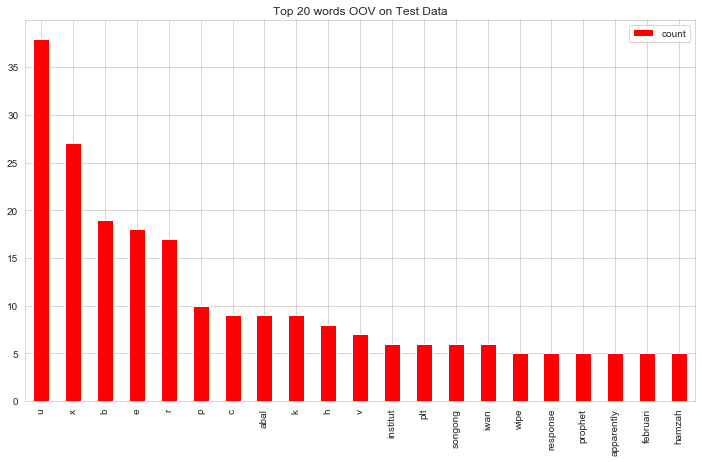

In [12]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

- **With Translate**

In [13]:
oov_test = oov(fitur_trans_full, generate_ngrams(data_test_trans_full['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [14]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 30),
 ('x', 25),
 ('b', 17),
 ('vibe', 12),
 ('e', 11),
 ('r', 11),
 ('c', 8),
 ('p', 8),
 ('v', 6),
 ('k', 6),
 ('plt', 6),
 ('iwan', 6),
 ('hamzah', 5),
 ('cingkrang', 4),
 ('ijazah', 4),
 ('institut', 4),
 ('jokower', 4),
 ('tisu', 4),
 ('markus', 4),
 ('senvitz', 4),
 ('wasiat', 4),
 ('aki', 4),
 ('drive', 4),
 ('cabik', 4),
 ('h', 4),
 ('saus', 4),
 ('lobi', 4),
 ('exol', 4),
 ('sb', 4),
 ('borong', 4),
 ('anime', 4),
 ('kaligrafi', 4),
 ('leste', 4),
 ('bundar', 3),
 ('bersin', 3),
 ('rambu', 3),
 ('panel', 3),
 ('ajaib', 3),
 ('surup', 3),
 ('tirani', 3),
 ('didih', 3),
 ('bah', 3),
 ('manado', 3),
 ('hidayat', 3),
 ('hemat', 3),
 ('utu', 3),
 ('ceplos', 3),
 ('suster', 3),
 ('ilham', 3),
 ('tesis', 3),
 ('risma', 3),
 ('make', 3),
 ('tg', 3),
 ('pinang', 3),
 ('inklusivitas', 3),
 ('akrobat', 3),
 ('bandit', 3),
 ('bakso', 3),
 ('justin', 3),
 ('popularitas', 3),
 ('punggung', 3),
 ('jak', 3),
 ('gandeng', 3),
 ('jama', 3),
 ('duel', 3),
 ('sholatu', 3),
 ('madura', 3),
 

In [15]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  3141
number of unique OOV words :  2521


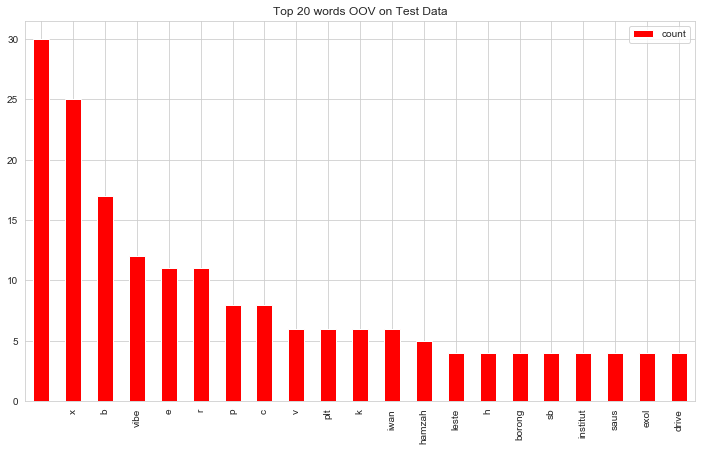

In [16]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

### Without Stopword Removal

- **Without Translate**

In [17]:
oov_test = oov(fitur_nostopword, generate_ngrams(data_test_nostopword['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [18]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 5210),
 ('i', 520),
 ('a', 434),
 ('u', 38),
 ('x', 27),
 ('b', 19),
 ('e', 18),
 ('r', 17),
 ('o', 11),
 ('p', 10),
 ('c', 9),
 ('k', 9),
 ('abal', 9),
 ('h', 8),
 ('t', 8),
 ('v', 7),
 ('institut', 6),
 ('s', 6),
 ('plt', 6),
 ('iwan', 6),
 ('wipe', 5),
 ('response', 5),
 ('embarrass', 5),
 ('apparently', 5),
 ('prophet', 5),
 ('bopeng', 5),
 ('februari', 5),
 ('hamzah', 5),
 ('cingkrang', 4),
 ('ijazah', 4),
 ('biksu', 4),
 ('satisfy', 4),
 ('green', 4),
 ('tea', 4),
 ('jokower', 4),
 ('lady', 4),
 ('yours', 4),
 ('gagas', 4),
 ('l', 4),
 ('gengsi', 4),
 ('alfian', 4),
 ('markus', 4),
 ('senvitz', 4),
 ('timpang', 4),
 ('explanation', 4),
 ('risma', 4),
 ('inclusivity', 4),
 ('krisis', 4),
 ('population', 4),
 ('aki', 4),
 ('date', 4),
 ('f', 4),
 ('ikon', 4),
 ('jepit', 4),
 ('riset', 4),
 ('whose', 4),
 ('amazon', 4),
 ('exol', 4),
 ('six', 4),
 ('d', 4),
 ('sb', 4),
 ('selingkuh', 4),
 ('martabat', 4),
 ('borong', 4),
 ('tanoe', 4),
 ('j', 4),
 ('minangkabau', 4),
 ('pucuk'

In [19]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  11186
number of unique OOV words :  3845


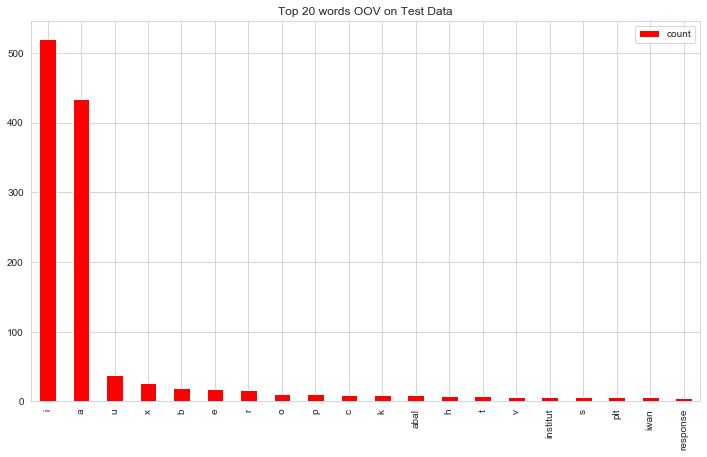

In [20]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

- **With Translate**

In [21]:
oov_test = oov(fitur_trans_nostopword, generate_ngrams(data_test_trans_nostopword['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [22]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 3189),
 ('x', 25),
 ('b', 17),
 ('i', 17),
 ('a', 14),
 ('vibe', 12),
 ('e', 11),
 ('r', 11),
 ('c', 8),
 ('p', 8),
 ('o', 7),
 ('t', 6),
 ('v', 6),
 ('k', 6),
 ('plt', 6),
 ('iwan', 6),
 ('hamzah', 5),
 ('cingkrang', 4),
 ('ijazah', 4),
 ('institut', 4),
 ('jokower', 4),
 ('tisu', 4),
 ('naksir', 4),
 ('markus', 4),
 ('senvitz', 4),
 ('s', 4),
 ('wasiat', 4),
 ('aki', 4),
 ('drive', 4),
 ('cabik', 4),
 ('h', 4),
 ('saus', 4),
 ('lobi', 4),
 ('ekspos', 4),
 ('exol', 4),
 ('d', 4),
 ('sb', 4),
 ('borong', 4),
 ('tanoe', 4),
 ('minangkabau', 4),
 ('anime', 4),
 ('kaligrafi', 4),
 ('leste', 4),
 ('bundar', 3),
 ('bersin', 3),
 ('rambu', 3),
 ('panel', 3),
 ('ajaib', 3),
 ('surup', 3),
 ('tirani', 3),
 ('didih', 3),
 ('bah', 3),
 ('hidayat', 3),
 ('hemat', 3),
 ('ceplos', 3),
 ('ilham', 3),
 ('tesis', 3),
 ('risma', 3),
 ('make', 3),
 ('tg', 3),
 ('pinang', 3),
 ('inklusivitas', 3),
 ('akrobat', 3),
 ('bandit', 3),
 ('bakso', 3),
 ('timpang', 3),
 ('justin', 3),
 ('popularitas', 3),


In [23]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  6476
number of unique OOV words :  2611


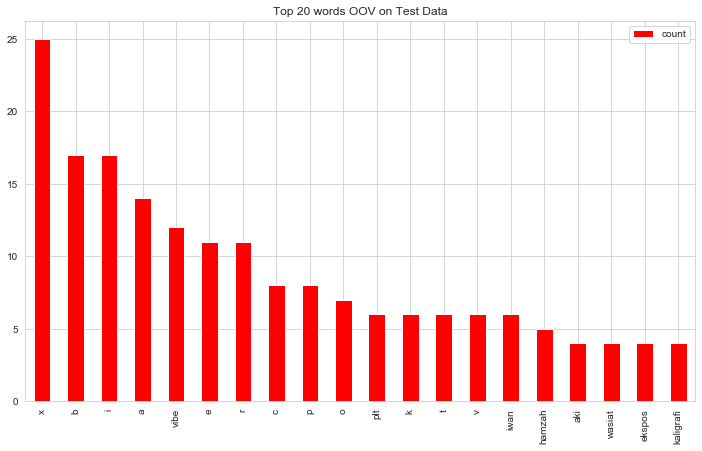

In [24]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

### Without Stemming and Stopword Removal

- **Without Translate**

In [25]:
oov_test = oov(fitur_nostemstop, generate_ngrams(data_test_nostemstop['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [26]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 5210),
 ('i', 520),
 ('a', 334),
 ('x', 27),
 ('b', 19),
 ('e', 13),
 ('r', 13),
 ('o', 11),
 ('p', 10),
 ('c', 9),
 ('k', 9),
 ('abal', 9),
 ('h', 8),
 ('t', 8),
 ('v', 7),
 ('interesting', 7),
 ('institut', 6),
 ('songong', 6),
 ('s', 6),
 ('plt', 6),
 ('tubuh', 6),
 ('cancel', 6),
 ('drive', 6),
 ('cuap', 6),
 ('iwan', 6),
 ('pengembangan', 6),
 ('angkatan', 6),
 ('gunanya', 5),
 ('coward', 5),
 ('walking', 5),
 ('sendirian', 5),
 ('jatuhnya', 5),
 ('mengelola', 5),
 ('hadapi', 5),
 ('poros', 5),
 ('penodaan', 5),
 ('western', 5),
 ('apparently', 5),
 ('prophet', 5),
 ('koordinasi', 5),
 ('impian', 5),
 ('label', 5),
 ('bus', 5),
 ('pengkhianatan', 5),
 ('affairs', 5),
 ('cabang', 5),
 ('puan', 5),
 ('biarlah', 5),
 ('menampak', 5),
 ('spend', 5),
 ('iraq', 5),
 ('surely', 5),
 ('iphone', 5),
 ('dikenal', 5),
 ('bopeng', 5),
 ('menyindir', 5),
 ('februari', 5),
 ('pencerahan', 5),
 ('hamzah', 5),
 ('pipi', 5),
 ('cingkrang', 4),
 ('terpengaruh', 4),
 ('ijazah', 4),
 ('incumben

In [27]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  14932
number of unique OOV words :  6746


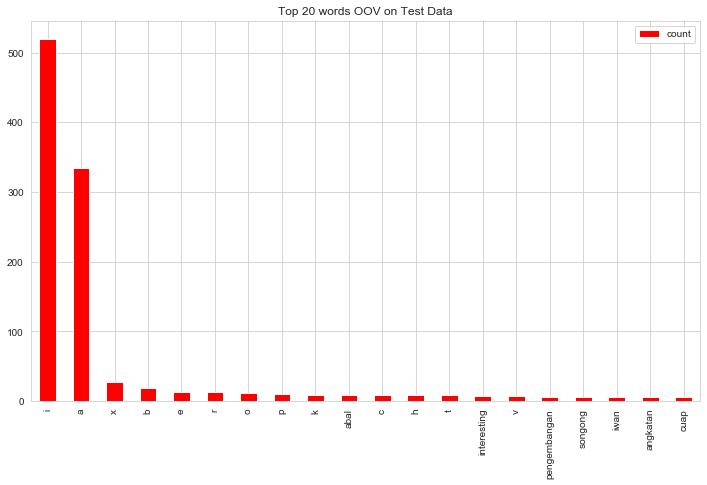

In [28]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()

- **With Translate**

In [29]:
oov_test = oov(fitur_trans_nostemstop, generate_ngrams(data_test_trans_nostemstop['Tweet_Parsed']))
oov_test_count = oov_count(oov_test)

In [30]:
sorted(oov_test_count.items(), reverse=True, key=lambda item: item[1])

[('', 3189),
 ('x', 25),
 ('b', 17),
 ('i', 17),
 ('a', 14),
 ('vibe', 12),
 ('abal', 9),
 ('c', 8),
 ('p', 8),
 ('o', 7),
 ('r', 7),
 ('banding', 7),
 ('label', 7),
 ('e', 6),
 ('songong', 6),
 ('t', 6),
 ('v', 6),
 ('k', 6),
 ('plt', 6),
 ('iwan', 6),
 ('angkatan', 6),
 ('jatuhnya', 5),
 ('beritanya', 5),
 ('gaji', 5),
 ('puan', 5),
 ('bopeng', 5),
 ('menyindir', 5),
 ('hamzah', 5),
 ('pipi', 5),
 ('cingkrang', 4),
 ('ijazah', 4),
 ('biksu', 4),
 ('institut', 4),
 ('agustus', 4),
 ('kemacetan', 4),
 ('jokower', 4),
 ('tisu', 4),
 ('mi', 4),
 ('kian', 4),
 ('mengabaikan', 4),
 ('naksir', 4),
 ('desember', 4),
 ('menjilat', 4),
 ('lautan', 4),
 ('mendunia', 4),
 ('atasnya', 4),
 ('poros', 4),
 ('alfian', 4),
 ('istikamah', 4),
 ('dimarahi', 4),
 ('markus', 4),
 ('senvitz', 4),
 ('s', 4),
 ('butuhkan', 4),
 ('dimata', 4),
 ('berdaulat', 4),
 ('aki', 4),
 ('tampilan', 4),
 ('drive', 4),
 ('ekspor', 4),
 ('israeli', 4),
 ('pendusta', 4),
 ('ributkan', 4),
 ('h', 4),
 ('mengerjakan', 4),
 

In [31]:
print("number of OOV words : ", len(oov_test))
print("number of unique OOV words : ", len(oov_test_count))

number of OOV words :  9561
number of unique OOV words :  5016


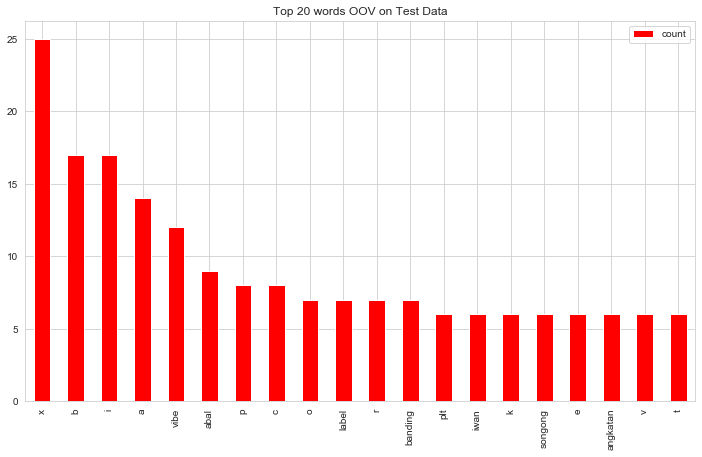

In [32]:
df_oov_test = pd.DataFrame(oov_test_count.items(),columns=["Tweet","count"])
df_oov_test.sort_values(['count'],ascending=False)[1:21].plot(
    kind='bar', y='count',x='Tweet', color='red', title='Top 20 words OOV on Test Data', figsize=(12,7))
plt.xlabel("")
plt.show()